In [3]:
import spacy 
nlp = spacy.load("fr_core_news_sm")

In [4]:
import nltk
nltk.download('popular')  # Télécharge les données de base (dont Snowball)
nltk.download('stopwords')  # Pour les stopwords français

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/larry/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/larry/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/larry/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/larry/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/larry/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/larry/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!

True

In [5]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
# la liste fr-stop contient les stop words en français
fr_stop

{'a',
 'abord',
 'afin',
 'ah',
 'ai',
 'aie',
 'ainsi',
 'ait',
 'allaient',
 'allons',
 'alors',
 'anterieur',
 'anterieure',
 'anterieures',
 'antérieur',
 'antérieure',
 'antérieures',
 'apres',
 'après',
 'as',
 'assez',
 'attendu',
 'au',
 'aupres',
 'auquel',
 'aura',
 'auraient',
 'aurait',
 'auront',
 'aussi',
 'autre',
 'autrement',
 'autres',
 'autrui',
 'aux',
 'auxquelles',
 'auxquels',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avoir',
 'avons',
 'ayant',
 'bas',
 'basee',
 'bat',
 "c'",
 'car',
 'ce',
 'ceci',
 'cela',
 'celle',
 'celle-ci',
 'celle-la',
 'celle-là',
 'celles',
 'celles-ci',
 'celles-la',
 'celles-là',
 'celui',
 'celui-ci',
 'celui-la',
 'celui-là',
 'cent',
 'cependant',
 'certain',
 'certaine',
 'certaines',
 'certains',
 'certes',
 'ces',
 'cet',
 'cette',
 'ceux',
 'ceux-ci',
 'ceux-là',
 'chacun',
 'chacune',
 'chaque',
 'chez',
 'ci',
 'cinq',
 'cinquantaine',
 'cinquante',
 'cinquantième',
 'cinquième',
 'combien',
 'comme',
 'comment',

In [6]:
import string
texte = "la portée du signal est très faible."
doc = nlp(texte)

for token in doc:
    if token in fr_stop:
        pass
    else:
        print((token.text, token.lemma_))

('la', 'le')
('portée', 'portée')
('du', 'de')
('signal', 'signal')
('est', 'être')
('très', 'très')
('faible', 'faible')
('.', '.')


In [7]:
def create_lemmas(corpus, output):
    with open(output, "a", encoding="utf-8") as f_w:
        f_w.write("mot" + "\t" + "lemme\n")
        with open(corpus, "r", encoding="utf-8") as f:
            for ligne in f.readlines():
                contenu = str(ligne)
                if "<texte>" in ligne:
                    #print("texte ok")
                    contenu = contenu.replace("<texte>", "")
                    contenu = contenu.replace("</texte>", "")
                    #print(contenu)
                    
                elif "<titre>" in ligne:
                    #print("titre ok")
                    contenu = contenu.replace("<titre>", "")
                    contenu = contenu.replace("</titre>", "")
                    #print(contenu)
                
                else:
                    continue

                nlp_content = nlp(contenu)
                for token in nlp_content:
                    if (token in fr_stop) or (token == "\\s+") or (token=="\n") or (token=="\t") or (token == " "):
                        pass
                    else:
                        to_write = token.text + "\t" + token.lemma_ + "\n"
                        if to_write.lower() != to_write.upper():
                            f_w.write(to_write)

In [8]:
create_lemmas("../TD3/corpus_nettoyé2.XML",
               "./lemmes.csv")

In [9]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("french") # Choose a language

In [10]:
from nltk.stem import SnowballStemmer

def create_stems(corpus, output):
    
    with open(output, "a", encoding="utf-8") as f_w:
        f_w.write("mot" + "\t" + "racine\n")
        with open(corpus, "r", encoding="utf-8") as f:
            for ligne in f.readlines():
                contenu = str(ligne)
                if "<texte>" in ligne:
                    #print("texte ok")
                    contenu = contenu.replace("<texte>", "")
                    contenu = contenu.replace("</texte>", "")
                    #print(contenu)
                    
                elif "<titre>" in ligne:
                    #print("titre ok")
                    contenu = contenu.replace("<titre>", "")
                    contenu = contenu.replace("</titre>", "")
                    #print(contenu)
                
                else:
                    continue

                nlp_content = nlp(contenu)
                for token in nlp_content:
                    if (token in fr_stop) or (token == "\\s+") or (token=="\n") or (token=="\t") or (token == " "):
                        pass
                    else:
                        to_write = token.text + "\t" + stemmer.stem(token.text) + "\n"
                        if to_write.lower() != to_write.upper():
                            f_w.write(to_write)

In [11]:
create_stems("../TD3/corpus_nettoyé2.XML",
               "./stems.csv")

===== STATISTIQUES GÉNÉRALES =====
Nombre total de mots analysés (lemmes): 168821
Nombre total de mots analysés (stems): 168437

===== FORMES UNIQUES =====
Mots uniques (lemmes): 14725
Lemmes uniques: 11110
Mots uniques (stems): 14719
Racines uniques: 8497

===== TAUX DE RÉDUCTION =====
Taux de réduction par lemmatisation: 24.55%
Taux de réduction par stemming: 42.27%

===== DISTRIBUTION DES FRÉQUENCES =====
Top 10 lemmes les plus fréquents:
lemme
le         8398
de         6698
un         2432
être       2040
il         1424
pouvoir    1022
avoir       984
se          972
que         970
ce          966
Name: count, dtype: int64

Top 10 racines les plus fréquentes:
racine
l'           7356
d'           6554
une          1158
un           1146
est          1074
s'            968
qu'           962
il            912
le            744
entrepris     666
Name: count, dtype: int64

===== EXEMPLES DE MAPPINGS =====
Exemples de mappings mot -> lemme:
être: est, était, êtes, sont, soit...
pouvo

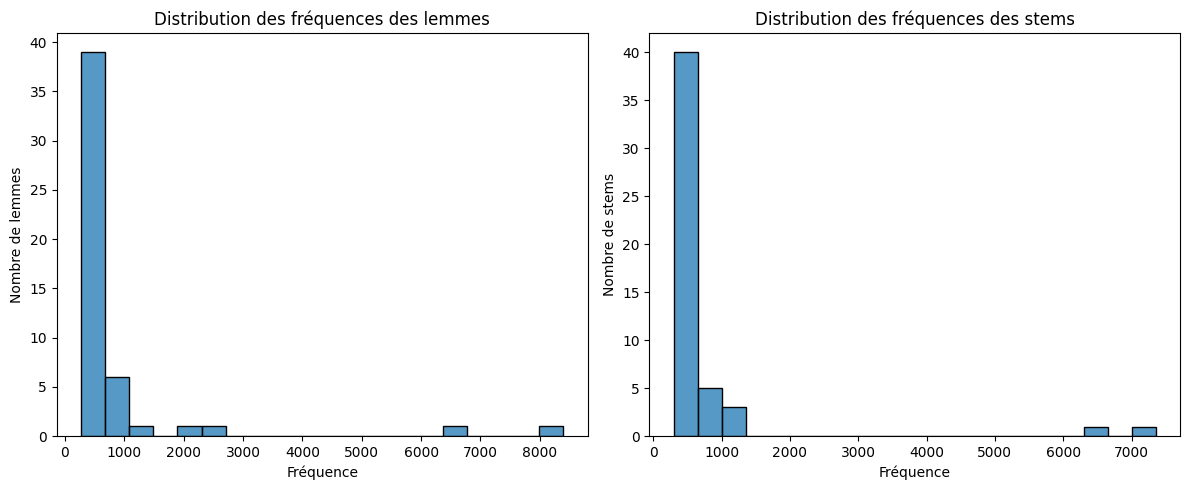


===== COMPARAISON LEMMES VS STEMS =====
Nombre de paires uniques (lemme, racine): 11771
Exemples où lemme ≠ racine:


: 

In [1]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# %%
def calculate_nlp_stats(lemmas_path, stems_path, output_comparison=None):
    """
    Calcule et affiche des statistiques comparatives sur les fichiers de lemmes et de racines.
    
    Args:
        lemmas_path: Chemin vers le fichier CSV des lemmes
        stems_path: Chemin vers le fichier CSV des racines
        output_comparison: Chemin pour enregistrer un fichier de comparaison (optionnel)
    """
    # Charger les fichiers
    lemmas_df = pd.read_csv(lemmas_path, sep='\t')
    stems_df = pd.read_csv(stems_path, sep='\t')
    
    # Nettoyer les données (éliminer lignes vides ou invalides)
    lemmas_df = lemmas_df.dropna()
    stems_df = stems_df.dropna()
    
    # 1. Statistiques générales
    print("===== STATISTIQUES GÉNÉRALES =====")
    print(f"Nombre total de mots analysés (lemmes): {len(lemmas_df)}")
    print(f"Nombre total de mots analysés (stems): {len(stems_df)}")
    
    # 2. Nombre de formes uniques
    unique_words_lemmas = lemmas_df['mot'].nunique()
    unique_lemmas = lemmas_df['lemme'].nunique()
    unique_words_stems = stems_df['mot'].nunique()
    unique_stems = stems_df['racine'].nunique()
    
    print("\n===== FORMES UNIQUES =====")
    print(f"Mots uniques (lemmes): {unique_words_lemmas}")
    print(f"Lemmes uniques: {unique_lemmas}")
    print(f"Mots uniques (stems): {unique_words_stems}")
    print(f"Racines uniques: {unique_stems}")
    
    # 3. Taux de réduction
    reduction_rate_lemmas = (1 - unique_lemmas / unique_words_lemmas) * 100
    reduction_rate_stems = (1 - unique_stems / unique_words_stems) * 100
    
    print("\n===== TAUX DE RÉDUCTION =====")
    print(f"Taux de réduction par lemmatisation: {reduction_rate_lemmas:.2f}%")
    print(f"Taux de réduction par stemming: {reduction_rate_stems:.2f}%")
    
    # 4. Distribution des fréquences
    lemma_counts = lemmas_df['lemme'].value_counts()
    stem_counts = stems_df['racine'].value_counts()
    
    print("\n===== DISTRIBUTION DES FRÉQUENCES =====")
    print("Top 10 lemmes les plus fréquents:")
    print(lemma_counts.head(10))
    
    print("\nTop 10 racines les plus fréquentes:")
    print(stem_counts.head(10))
    
    # 5. Exemples de mappings
    print("\n===== EXEMPLES DE MAPPINGS =====")
    print("Exemples de mappings mot -> lemme:")
    mapping_examples_lemmas = lemmas_df.groupby('lemme')['mot'].unique().reset_index()
    mapping_examples_lemmas['mot_count'] = mapping_examples_lemmas['mot'].apply(len)
    mapping_examples_lemmas = mapping_examples_lemmas.sort_values('mot_count', ascending=False).head(10)
    
    for _, row in mapping_examples_lemmas.iterrows():
        print(f"{row['lemme']}: {', '.join(row['mot'][:5])}{'...' if len(row['mot']) > 5 else ''}")
    
    print("\nExemples de mappings mot -> racine:")
    mapping_examples_stems = stems_df.groupby('racine')['mot'].unique().reset_index()
    mapping_examples_stems['mot_count'] = mapping_examples_stems['mot'].apply(len)
    mapping_examples_stems = mapping_examples_stems.sort_values('mot_count', ascending=False).head(10)
    
    for _, row in mapping_examples_stems.iterrows():
        print(f"{row['racine']}: {', '.join(row['mot'][:5])}{'...' if len(row['mot']) > 5 else ''}")
    
    # 6. Visualisation de la distribution des fréquences
    plt.figure(figsize=(12, 5))
    
    # Distribution des lemmes
    plt.subplot(1, 2, 1)
    sns.histplot(lemma_counts.head(50), bins=20)
    plt.title('Distribution des fréquences des lemmes')
    plt.xlabel('Fréquence')
    plt.ylabel('Nombre de lemmes')
    
    # Distribution des stems
    plt.subplot(1, 2, 2)
    sns.histplot(stem_counts.head(50), bins=20)
    plt.title('Distribution des fréquences des stems')
    plt.xlabel('Fréquence')
    plt.ylabel('Nombre de stems')
    
    plt.tight_layout()
    plt.show()
    
    # 7. Comparer lemmes et racines (pour les mêmes mots)
    # Fusionner les DataFrames sur la colonne 'mot'
    merged_df = pd.merge(lemmas_df, stems_df, on='mot', how='inner')
    unique_transformations = merged_df.groupby(['lemme', 'racine']).size().reset_index(name='count')
    
    print("\n===== COMPARAISON LEMMES VS STEMS =====")
    print(f"Nombre de paires uniques (lemme, racine): {len(unique_transformations)}")
    print("Exemples où lemme ≠ racine:")
    
    diff_examples = merged_df[merged_df['lemme'] != merged_df['racine']].drop_duplicates(['lemme', 'racine']).head(10)
    for _, row in diff_examples.iterrows():
        print(f"Mot: {row['mot']} → Lemme: {row['lemme']} → Racine: {row['racine']}")
    
    # 8. Sauvegarder la comparaison si requis
    if output_comparison:
        with open(output_comparison, 'w', encoding='utf-8') as f:
            f.write("# Comparaison Lemmatisation vs Stemming\n\n")
            f.write("## Statistiques générales\n")
            f.write(f"- Mots analysés: {len(lemmas_df)}\n")
            f.write(f"- Mots uniques: {unique_words_lemmas}\n")
            f.write(f"- Lemmes uniques: {unique_lemmas}\n")
            f.write(f"- Racines uniques: {unique_stems}\n")
            f.write(f"- Taux de réduction (lemmatisation): {reduction_rate_lemmas:.2f}%\n")
            f.write(f"- Taux de réduction (stemming): {reduction_rate_stems:.2f}%\n\n")
            
            f.write("## Conclusions\n")
            if reduction_rate_stems > reduction_rate_lemmas:
                f.write("- Le stemming permet une réduction plus importante du vocabulaire.\n")
            else:
                f.write("- La lemmatisation permet une réduction plus importante du vocabulaire.\n")
            
            f.write("- La lemmatisation préserve mieux le sens linguistique des mots.\n")
            f.write("- Le stemming est généralement plus rapide mais moins précis linguistiquement.\n")
        print(f"\nComparaison sauvegardée dans {output_comparison}")

# %%
# Exécuter l'analyse
calculate_nlp_stats(
    lemmas_path="./lemmes.csv",
    stems_path="./stems.csv",
    output_comparison="./comparaison_lemmes_stems.md"
)

# %%
# Analyse supplémentaire : longueur des lemmes vs longueur des stems
def compare_length_reduction():
    """Compare la réduction de longueur entre mots originaux, lemmes et stems"""
    lemmas_df = pd.read_csv("./lemmes.csv", sep='\t')
    stems_df = pd.read_csv("./stems.csv", sep='\t')
    
    # Calculer les longueurs
    lemmas_df['mot_len'] = lemmas_df['mot'].apply(len)
    lemmas_df['lemme_len'] = lemmas_df['lemme'].apply(len)
    lemmas_df['len_diff'] = lemmas_df['mot_len'] - lemmas_df['lemme_len']
    
    stems_df['mot_len'] = stems_df['mot'].apply(len)
    stems_df['stem_len'] = stems_df['racine'].apply(len)
    stems_df['len_diff'] = stems_df['mot_len'] - stems_df['stem_len']
    
    # Afficher les statistiques
    print("===== RÉDUCTION DE LONGUEUR =====")
    print("Lemmatisation:")
    print(f"Longueur moyenne des mots: {lemmas_df['mot_len'].mean():.2f} caractères")
    print(f"Longueur moyenne des lemmes: {lemmas_df['lemme_len'].mean():.2f} caractères")
    print(f"Réduction moyenne: {lemmas_df['len_diff'].mean():.2f} caractères")
    
    print("\nStemming:")
    print(f"Longueur moyenne des mots: {stems_df['mot_len'].mean():.2f} caractères")
    print(f"Longueur moyenne des stems: {stems_df['stem_len'].mean():.2f} caractères")
    print(f"Réduction moyenne: {stems_df['len_diff'].mean():.2f} caractères")
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(lemmas_df['mot_len'], lemmas_df['lemme_len'], alpha=0.1)
    plt.plot([0, 20], [0, 20], 'r--')  # Ligne diagonale x=y
    plt.xlabel('Longueur du mot original')
    plt.ylabel('Longueur du lemme')
    plt.title('Mot vs Lemme')
    
    plt.subplot(1, 2, 2)
    plt.scatter(stems_df['mot_len'], stems_df['stem_len'], alpha=0.1)
    plt.plot([0, 20], [0, 20], 'r--')  # Ligne diagonale x=y
    plt.xlabel('Longueur du mot original')
    plt.ylabel('Longueur du stem')
    plt.title('Mot vs Stem')
    
    plt.tight_layout()
    plt.show()

# %%
compare_length_reduction()

# %%
# Analyse de la pertinence linguistique
def analyze_linguistic_relevance():
    """Analyse la pertinence linguistique en comparant des exemples de lemmes et stems"""
    lemmas_df = pd.read_csv("./lemmes.csv", sep='\t')
    stems_df = pd.read_csv("./stems.csv", sep='\t')
    
    # Fusionner pour comparer
    merged = pd.merge(lemmas_df, stems_df, on='mot', how='inner')
    
    # Exemples où lemme et stem diffèrent significativement
    significant_diff = merged[merged['lemme'] != merged['racine']]
    
    # Sélectionner quelques exemples intéressants (verbes, adjectifs, etc.)
    print("===== ANALYSE LINGUISTIQUE =====")
    print("Exemples où lemmatisation et stemming donnent des résultats différents:")
    
    # Prendre 15 exemples aléatoires
    samples = significant_diff.sample(min(15, len(significant_diff)))
    for _, row in samples.iterrows():
        print(f"Mot: {row['mot']} → Lemme: {row['lemme']} → Stem: {row['racine']}")
    
    # Cas particuliers des verbes
    verbs = merged[merged['lemme'].str.endswith('er') | merged['lemme'].str.endswith('ir') | merged['lemme'].str.endswith('oir') | merged['lemme'].str.endswith('re')]
    
    print("\nCas des verbes:")
    for _, row in verbs.sample(min(10, len(verbs))).iterrows():
        print(f"Mot: {row['mot']} → Lemme: {row['lemme']} → Stem: {row['racine']}")

# %%
analyze_linguistic_relevance()

Parfois stem des noms propres qu'on veut pas forcément changer / on souhaite garder tels qu'ils sont